In [68]:
from datasets import load_dataset

case_hold = load_dataset("lex_glue", "case_hold")
print(case_hold["train"][1])  # View first sample

{'context': 'Colameta used customer information that he took from Protégé. Additionally, Colameta admits to having taken at least two Protégé proposals with him to Monument. This type of information may constitute trade secrets. See G.L.c. 266, §30 (defining “trade secret” as used in G.L.c. 93, §42, as including “anything tangible or intangible or electronically kept or stored, which constitutes, represents, evidences or records a secret scientific, technical, merchandising, production or management information, design, process, procedure, formula, invention or improvement”); Warner-Lambert Co., 427 Mass. at 49 (“ [Confidential and proprietary business information may be entitled to protection, even if such information cannot claim trade secret protection”); see, e.g., Augat, Inc., 409 Mass. at 173 (<HOLDING>). “Matters of public knowledge or of general', 'endings': ['recognizing that even if a plaintiff claims certain information constitutes trade secrets its claim may not depend on t

In [69]:
# Get dataset statistics and structure
print("Dataset structure:", case_hold)
print("\nAvailable splits:", case_hold.keys())

Dataset structure: DatasetDict({
    train: Dataset({
        features: ['context', 'endings', 'label'],
        num_rows: 45000
    })
    test: Dataset({
        features: ['context', 'endings', 'label'],
        num_rows: 3600
    })
    validation: Dataset({
        features: ['context', 'endings', 'label'],
        num_rows: 3900
    })
})

Available splits: dict_keys(['train', 'test', 'validation'])


In [70]:
# import os
# import pandas as pd

# # Define your custom path
# output_dir = "C:/Users/Manan/Desktop/case_hold_csv"

# # Create directory if it doesn't exist
# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)
#     print(f"Created directory: {output_dir}")

# # Save each split as CSV
# for split in case_hold.keys():
#     df = pd.DataFrame(case_hold[split])
#     csv_path = os.path.join(output_dir, f"case_hold_{split}.csv")
#     df.to_csv(csv_path, index=False)


In [71]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [72]:
# Get sample text from the dataset
sample_text = case_hold["train"][0]["context"]
print("Original text sample:")
print(sample_text[:500] + "...\n")  # Show first 500 chars

Original text sample:
Drapeau’s cohorts, the cohort would be a “victim” of making the bomb. Further, firebombs are inherently dangerous. There is no peaceful purpose for making a bomb. Felony offenses that involve explosives qualify as “violent crimes” for purposes of enhancing the sentences of career offenders. See 18 U.S.C. § 924(e)(2)(B)(ii) (defining a “violent felony” as: “any crime punishable by imprisonment for a term exceeding one year ... that ... involves use of explosives”). Courts have found possession of...



## Basic Pre Processing 

In [73]:
# 1. Tokenization - Sentence Level
sentences = sent_tokenize(sample_text)
print(f"Sentence Tokenization (first 3 of {len(sentences)} sentences):")
for i, sentence in enumerate(sentences[:3]):
    print(f"Sentence {i+1}: {sentence}")
print()

# 2. Tokenization - Word Level
words = word_tokenize(sample_text)
print(f"Word Tokenization (first 20 of {len(words)} words):")
print(words[:20])
print()

Sentence Tokenization (first 3 of 9 sentences):
Sentence 1: Drapeau’s cohorts, the cohort would be a “victim” of making the bomb.
Sentence 2: Further, firebombs are inherently dangerous.
Sentence 3: There is no peaceful purpose for making a bomb.

Word Tokenization (first 20 of 189 words):
['Drapeau', '’', 's', 'cohorts', ',', 'the', 'cohort', 'would', 'be', 'a', '“', 'victim', '”', 'of', 'making', 'the', 'bomb', '.', 'Further', ',']



In [74]:
# 3. Converting to lowercase
words_lower = [word.lower() for word in words]
print("After converting to lowercase (first 20):")
print(words_lower[:20])
print()

After converting to lowercase (first 20):
['drapeau', '’', 's', 'cohorts', ',', 'the', 'cohort', 'would', 'be', 'a', '“', 'victim', '”', 'of', 'making', 'the', 'bomb', '.', 'further', ',']



In [75]:
# 4. Stopword Removal
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words_lower if word.isalnum() and word not in stop_words]
print(f"After stopword removal (first 20 of {len(filtered_words)} words):")
print(filtered_words[:20])
print()

After stopword removal (first 20 of 80 words):
['drapeau', 'cohorts', 'cohort', 'would', 'victim', 'making', 'bomb', 'firebombs', 'inherently', 'dangerous', 'peaceful', 'purpose', 'making', 'bomb', 'felony', 'offenses', 'involve', 'explosives', 'qualify', 'violent']



In [76]:
# 5. Frequency Distribution and Word Count
word_freq = Counter(filtered_words)
print(f"Total unique words after preprocessing: {len(word_freq)}")
print("\nMost common 15 words:")
for word, count in word_freq.most_common(15):
    print(f"{word}: {count}")

Total unique words after preprocessing: 67

Most common 15 words:
bomb: 4
would: 2
making: 2
purpose: 2
felony: 2
explosives: 2
violent: 2
see: 2
crime: 2
united: 2
states: 2
drapeau: 1
cohorts: 1
cohort: 1
victim: 1


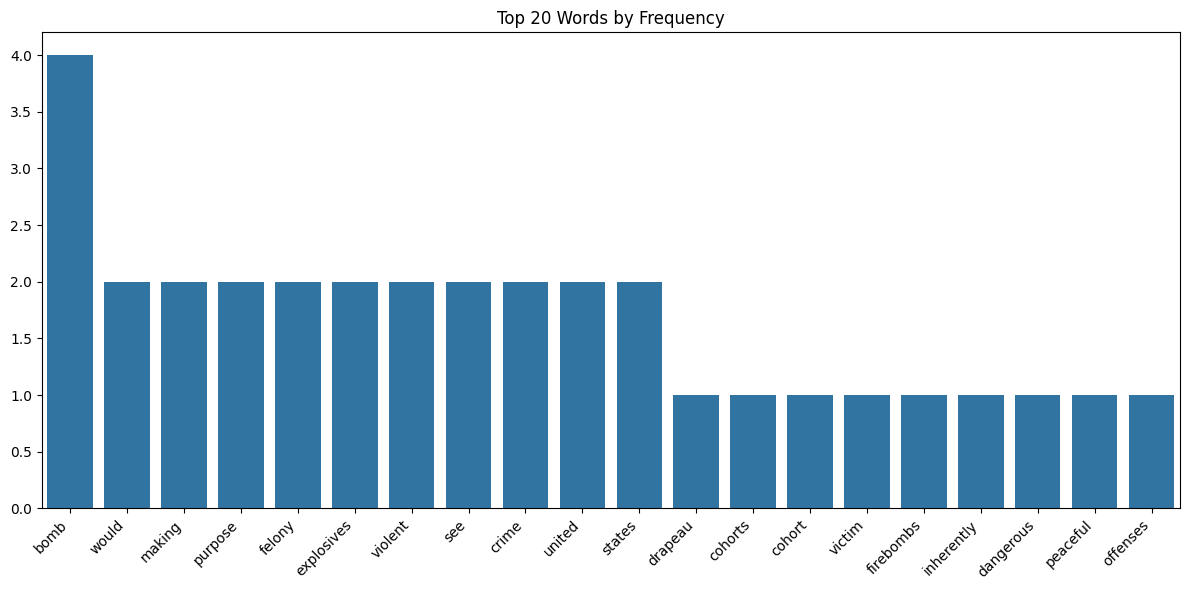

In [77]:
# 6. Visualize frequency distribution
plt.figure(figsize=(12, 6))
top_words = dict(word_freq.most_common(20))
sns.barplot(x=list(top_words.keys()), y=list(top_words.values()))
plt.title('Top 20 Words by Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Word frequency dataframe (top 10 rows):
         Word  Frequency
0        bomb          4
1       would          2
2      making          2
3     purpose          2
4      felony          2
5  explosives          2
6     violent          2
7         see          2
8       crime          2
9      united          2


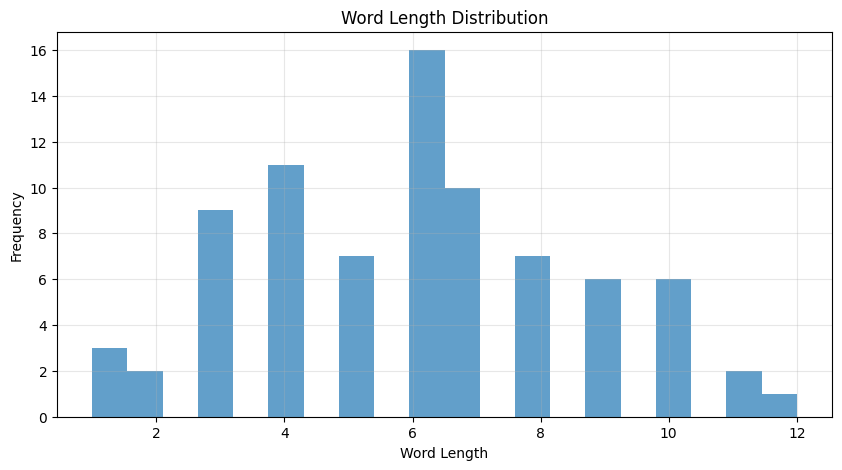


Average word length after preprocessing: 6.04 characters


In [78]:
# 7. Create a DataFrame for better analysis
word_freq_df = pd.DataFrame(word_freq.most_common(), columns=['Word', 'Frequency'])
print("\nWord frequency dataframe (top 10 rows):")
print(word_freq_df.head(10))

# 8. Word length distribution
word_lengths = [len(word) for word in filtered_words]
plt.figure(figsize=(10, 5))
plt.hist(word_lengths, bins=20, alpha=0.7)
plt.title('Word Length Distribution')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nAverage word length after preprocessing: {sum(word_lengths)/len(word_lengths):.2f} characters")

## Applying NER 
##### For Entity Extraction

In [79]:
# %pip install spacy
# !python -m spacy download en_core_web_lg

In [80]:
import spacy
import spacy.cli
from spacy import displacy
from collections import Counter
import matplotlib.pyplot as plt

# Load the large English model with good NER capabilities
nlp = spacy.load('en_core_web_lg')

# Function to extract entities from text
def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities


In [81]:
# Apply NER on a sample text from the dataset
sample_text = case_hold["train"][1]["context"]
entities = extract_entities(sample_text)

# Display the first 20 entities found
print("Sample of entities extracted:")
for entity, label in entities[:15]:
    print(f"{entity} -> {label}")

# Count entities by type
entity_counts = Counter([label for _, label in entities])
print("\nEntity type distribution:")
for label, count in entity_counts.most_common():
    print(f"{label}: {count}")

Sample of entities extracted:
Colameta -> ORG
Colameta -> ORG
at least two -> CARDINAL
G.L.c -> ORG
266 -> CARDINAL
G.L.c -> ORG
93 -> CARDINAL
42 -> CARDINAL
Warner-Lambert Co. -> ORG
427 -> CARDINAL
Mass. -> GPE
49 -> DATE
Augat, Inc. -> ORG
409 -> CARDINAL
Mass. -> GPE

Entity type distribution:
CARDINAL: 7
ORG: 6
GPE: 2
DATE: 1


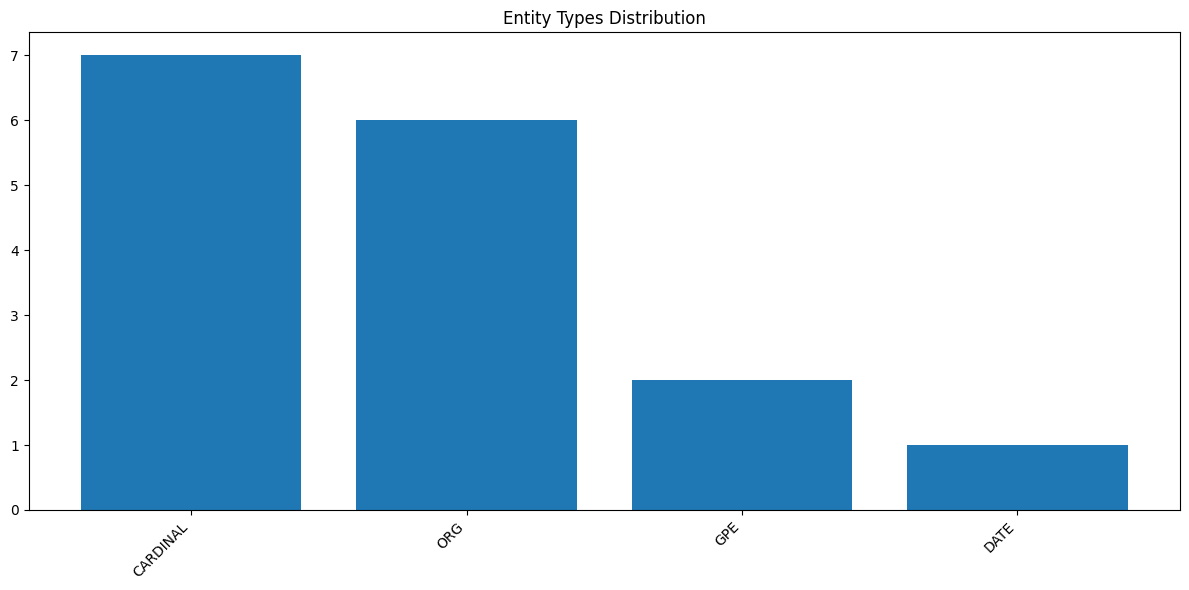

In [82]:
# Visualize entity distribution
plt.figure(figsize=(12, 6))
labels, counts = zip(*entity_counts.most_common())
plt.bar(labels, counts)
plt.title('Entity Types Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [83]:
# Visualize entities in text (first 500 characters)
short_sample = sample_text[:500]
doc = nlp(short_sample)
displacy.render(doc, style="ent", jupyter=True)

# Extract specific entity types of interest
legal_entities = {
    "PERSON": [],     # People names
    "ORG": [],        # Organizations 
    "DATE": [],       # Dates
    "MONEY": [],      # Monetary values
    "LAW": [],        # Laws (may be captured as ORG in some models)
    "GPE": [],        # Geopolitical entities (countries, cities)
    "NORP": []        # Nationalities, religious or political groups
}

In [84]:
# Populate the entity lists
for entity, label in entities:
    if label in legal_entities:
        legal_entities[label].append(entity)

# Display most common entities by type
print("\n--- Most common entities by type ---")
for entity_type, entities_list in legal_entities.items():
    if entities_list:
        entity_counter = Counter(entities_list)
        print(f"\n{entity_type}:")
        for entity, count in entity_counter.most_common(7):
            print(f"  • {entity}: {count}")



--- Most common entities by type ---

ORG:
  • Colameta: 2
  • G.L.c: 2
  • Warner-Lambert Co.: 1
  • Augat, Inc.: 1

DATE:
  • 49: 1

GPE:
  • Mass.: 2


In [85]:
# Create a dataframe with all entities for easier analysis
entity_df = pd.DataFrame(entities, columns=['Entity', 'Type'])
print("\nEntity DataFrame Preview:")
print(entity_df.head(20))


Entity DataFrame Preview:
                Entity      Type
0             Colameta       ORG
1             Colameta       ORG
2         at least two  CARDINAL
3                G.L.c       ORG
4                  266  CARDINAL
5                G.L.c       ORG
6                   93  CARDINAL
7                   42  CARDINAL
8   Warner-Lambert Co.       ORG
9                  427  CARDINAL
10               Mass.       GPE
11                  49      DATE
12         Augat, Inc.       ORG
13                 409  CARDINAL
14               Mass.       GPE
15                 173  CARDINAL


In [ ]:
# # Save entities to CSV
# entity_df.to_csv('legal_entities.csv', index=False)
# print("\nEntities saved to legal_entities.csv")


Entities saved to legal_entities.csv


## TF-IDF and GloVE Implementation

#### Performing TF-IDF 

In [94]:
# TF-IDF Implementation Cell
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

# Get a larger sample of texts for better analysis
sample_size = 1000
texts = [case_hold["train"][i]["context"] for i in range(min(sample_size, len(case_hold["train"])))]


In [ ]:
# Initialize and fit TF-IDF Vectorizer
# Parameters:
# - max_features: Limit vocabulary size to most frequent terms
# - min_df: Ignore terms that appear in less than 5 documents
# - max_df: Ignore terms that appear in more than 90% of documents (like stopwords)
tfidf_vectorizer = TfidfVectorizer(max_features=5000, min_df=5, max_df=0.9)
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)

# Get feature names (terms) from the vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()
print(f"Vocabulary size: {len(feature_names)} terms")


Vocabulary size: 3228 terms


In [103]:
# Get the TF-IDF scores for the first document
first_doc_vector = tfidf_matrix[1]
first_doc_tfidf = [(feature_names[idx], first_doc_vector[0, idx]) 
                   for idx in first_doc_vector.nonzero()[1]]
# Sort by TF-IDF score (descending)
sorted_tfidf = sorted(first_doc_tfidf, key=lambda x: x[1], reverse=True)


In [101]:
# Display most important terms in first document
print("\nTop 20 terms with highest TF-IDF score in first document:")
for term, score in sorted_tfidf[:20]:
    print(f"{term}: {score:.4f}")


Top 20 terms with highest TF-IDF score in first document:
information: 0.4496
trade: 0.3743
or: 0.2645
mass: 0.2124
protection: 0.1915
used: 0.1673
scientific: 0.1280
customer: 0.1280
design: 0.1248
production: 0.1248
technical: 0.1248
represents: 0.1248
anything: 0.1248
records: 0.1220
defining: 0.1195
173: 0.1173
409: 0.1173
took: 0.1153
management: 0.1088
266: 0.1088


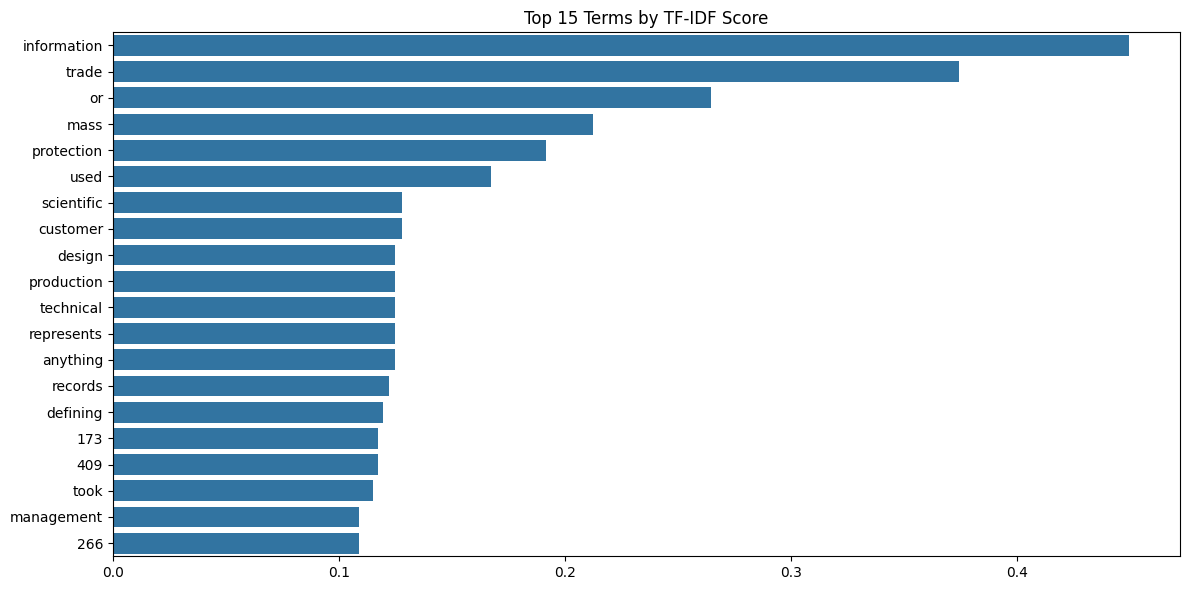

In [102]:
# Visualize top terms
plt.figure(figsize=(12, 6))
terms, scores = zip(*sorted_tfidf[:20])
sns.barplot(x=list(scores), y=list(terms))
plt.title('Top 15 Terms by TF-IDF Score')
plt.tight_layout()
plt.show()

#### Performing GloVe

In [108]:
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import os
import requests
import zipfile
import io

In [109]:
# Function to download GloVe embeddings if not already downloaded
def download_glove(glove_dir='glove'):
    if not os.path.exists(glove_dir):
        os.makedirs(glove_dir)
    
    glove_path = os.path.join(glove_dir, 'glove.6B.100d.txt')
    
    # Check if file already exists
    if not os.path.exists(glove_path):
        print("Downloading GloVe embeddings...")
        glove_url = "https://nlp.stanford.edu/data/glove.6B.zip"
        response = requests.get(glove_url)
        zip_file = zipfile.ZipFile(io.BytesIO(response.content))
        zip_file.extractall(glove_dir)

In [110]:
# Load GloVe embeddings (this might take a few minutes)
def load_glove_model(glove_path):
    print("Loading GloVe model...")
    glove_model = {}
    with open(glove_path, 'r', encoding='utf-8') as file:
        for line in file:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array([float(val) for val in split_line[1:]])
            glove_model[word] = embedding
    print(f"Loaded {len(glove_model)} word vectors.")
    return glove_model

In [113]:
# Download and load GloVe
try:
    glove_path = download_glove()
    glove_model = load_glove_model(glove_path)
except Exception as e:
    print(f"Error loading GloVe: {e}")
    print("Using a smaller subset for demonstration purposes.")
    # Create a small dummy model for demonstration
    glove_model = {}

# Function to get document embedding by averaging word vectors
def document_vector(doc, model):
    # Tokenize and preprocess
    words = [word.lower() for word in word_tokenize(doc) 
              if word.isalnum() and word.lower() in model]
    
    if not words:
        return np.zeros(100)  # Return zeros if no word found
    
    # Average the word vectors
    word_vectors = [model[word.lower()] for word in words]
    return np.mean(word_vectors, axis=0)
    
# Process a sample of documents
sample_texts = case_hold["train"][:50]
sample_docs = [sample["context"] for sample in sample_texts]

# Get embeddings for the sample documents
doc_embeddings = []
for doc in sample_docs:
    try:
        doc_embeddings.append(document_vector(doc, glove_model))
    except Exception as e:
        print(f"Error processing document: {e}")
        doc_embeddings.append(np.zeros(100))  # fallback to zeros

# Convert to numpy array
doc_embeddings = np.array(doc_embeddings)

# Use t-SNE to reduce dimensions for visualization
tsne = TSNE(n_components=2, random_state=42)
doc_tsne = tsne.fit_transform(doc_embeddings)


KeyboardInterrupt: 